In [ ]:
# pip install --upgrade scikit-learn      обновление пакетов сикита

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)

In [ ]:
derevo = DecisionTreeClassifier()
search = GridSearchCV(derevo,{'max_depth': range(1,11), 
                       'min_samples_split': range(2,11),
                       'min_samples_leaf' : range(1,11)
                       })
search.fit(X, y)

In [ ]:
best_model = search.best_estimator_
best_model.score(X, y)

0.9733333333333334

In [ ]:
derevo1 = DecisionTreeClassifier()
search1 = RandomizedSearchCV(derevo1,{'max_depth': range(1,11), 
                       'min_samples_split': range(2,11),
                       'min_samples_leaf' : range(1,11)
                       })
search1.fit(X, y)
best_tree = search1.best_estimator_
best_tree.score(X, y)

0.9733333333333334

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
predictions = best_tree.predict(X)
conf_matr = confusion_matrix(y, predictions)
conf_matr

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

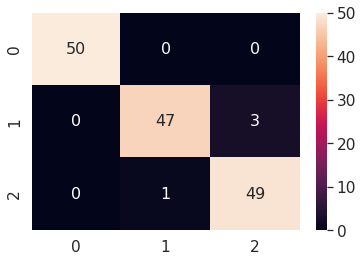

In [ ]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_matr, annot=True, annot_kws={"size": 16}) # font size

plt.show() # по вертикали предсказанне классы, по горизонтали реальные

In [ ]:
songs = pd.read_csv('./songs.csv')
songs.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [ ]:
X = songs.drop(['artist'], axis =1)
y = songs[['artist']]

In [ ]:
from sklearn.metrics import precision_score

#clf = DecisionTreeClassifier(criterion='entropy')
#clf.fit(X_train, y_train)

#predictions = clf.predict(X_test)

#precision = precision_score(y_test, predictions, average='micro')

In [ ]:
medicine = pd.read_csv('./heart.csv')
medicine

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

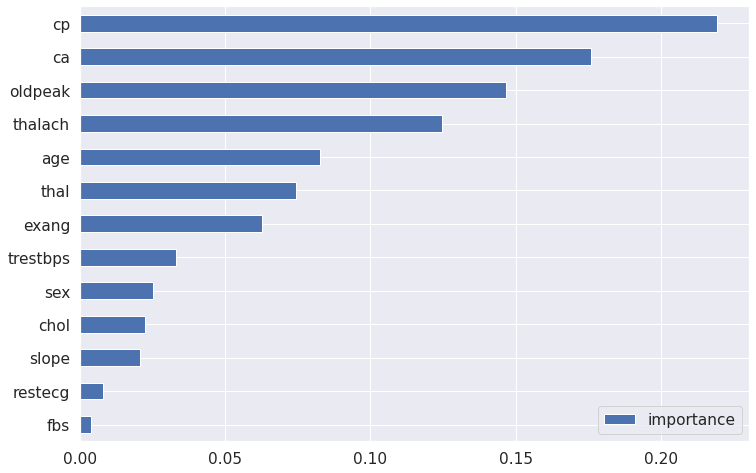

In [ ]:
np.random.seed(0)

X = medicine.iloc[:, :-1]
y = medicine.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
rf = RandomForestClassifier(10, max_depth=5)

rf.fit(X, y)

imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [ ]:
mushrooms = pd.read_csv('./training_mush.csv')
mushrooms.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,1,2,2,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,0,1,3,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,1,1,1,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,0,1,2,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,1,2,2,3,6,0,2,1,4,2,5,0,0


In [ ]:
X = mushrooms.iloc[:, :-1]
y = mushrooms.iloc[:,-1]
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

clf = RandomForestClassifier(random_state=0)
search = GridSearchCV(clf, {'n_estimators': range(10,51,10),
                            'max_depth': range(1,12,2) ,
                            'min_samples_leaf': range(1,8),
                            'min_samples_split': range(2,9,2)}, cv =3, n_jobs = -1)
search.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 51, 10)})

In [ ]:
clfs = search.best_estimator_
clfs.get_params()

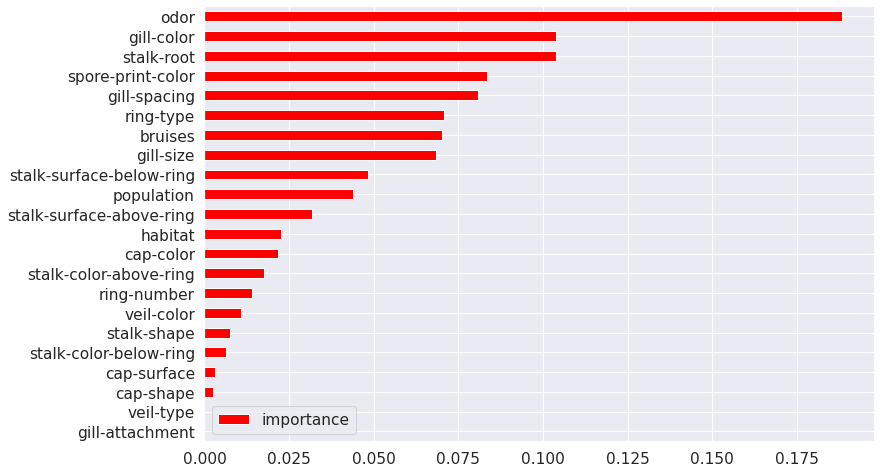

In [ ]:
imp = pd.DataFrame(clfs.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8), color = 'red')

In [ ]:
X_test = pd.read_csv('./testing_mush.csv')

In [ ]:
clfs.predict(X_test).sum()

976

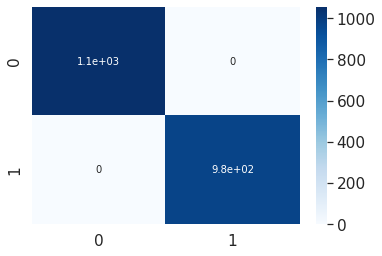

In [ ]:
y_test = pd.read_csv('./testing_y_mush.csv')
matrix = confusion_matrix( y_test, clfs.predict(X_test))
sns.heatmap(matrix, annot=True, cmap="Blues")
None

In [ ]:
data = pd.read_csv('./invasion.csv')
data

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [ ]:
data['class'].unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [ ]:
x_test = pd.read_csv('./operative_information.csv')
x_test

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813
...,...,...,...,...,...,...
1495,11.755466,5.583147,325.069957,0.170644,388400,13.210917
1496,12.220137,4.023177,439.975574,0.163958,195305,13.819358
1497,1.611053,7.864930,65.025106,0.430021,307856,47.369083
1498,7.114131,5.532188,391.178342,0.150117,51590,12.447761


In [ ]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [ ]:
dtr = DecisionTreeClassifier(criterion='entropy')

dtr.fit(x,y)

predict = dtr.predict(x_test)

print(sum(predict == 'cruiser'))
print(sum(predict == 'transport'))
print(sum(predict == 'fighter'))

229
596
675


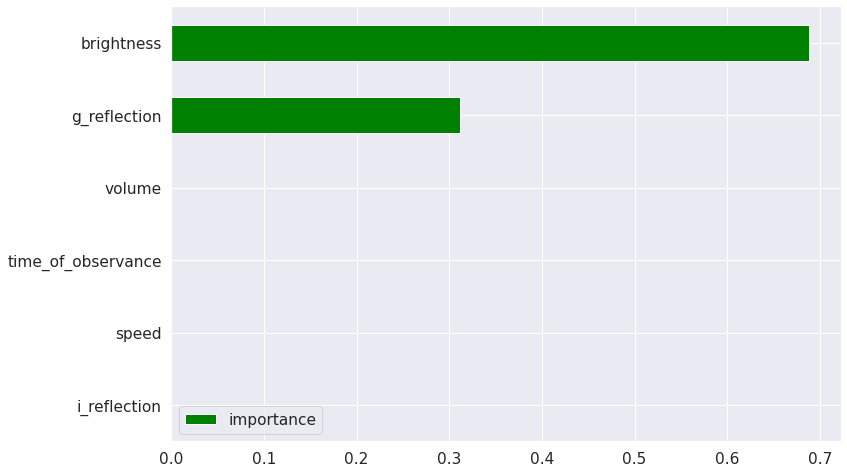

In [ ]:
imp = pd.DataFrame(dtr.feature_importances_, index=x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8), color = 'green')